In [50]:
# import os
# import warnings

# import numpy as np

import pickle
import pandas as pd
pd.set_option("display.max_rows",10)
# pd.set_option("display.max_columns", 10)
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx


from utils import *
from algo import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
# df_stops = filter_stops_by_distance_from_zurich_hb(load_df_stops(), 15000)
# df_stops

df_stops = filter_stops_by_distance_from_zurich_hb(load_df_stops_walk_time(), 15000)
df_stops

,stop_name,latitude,longitude,walk_time
stop_id,,,,
176,Zimmerberg-Basistunnel,47.351678,8.521958,"[(8503086, 388), (8591392, 566)]"
8500926,"Oetwil a.d.L., Schweizäcker",47.423627,8.403183,"[(8590616, 147), (8590737, 360)]"
8502075,"Zürich Flughafen, Carterminal",47.451024,8.563729,"[(8573205, 115), (8573205, 115), (8503016, 147..."
8502186,Dietikon Stoffelbach,47.393327,8.398960,"[(8590203, 551), (8502270, 552), (8590200, 582)]"
8502187,Rudolfstetten Hofacker,47.364670,8.376952,[]
...,...,...,...,...
8596007,"Schlieren, Geissweid",47.397815,8.444236,"[(8503509, 328), (8590805, 380), (8590788, 389..."
8596008,"Zürich, Hermetschloo",47.394148,8.473889,"[(8591274, 159), (8591130, 329), (8591284, 481..."
8596100,"Bassersdorf, Sportanlage",47.444464,8.610711,"[(8588315, 345)]"


In [52]:
df_connections = filter_connections_by_stops(load_df_connections(), df_stops)
df_connections = filter_by_time_interval(df_connections, Time(h=9), Time(h=10))
df_connections

,trip_id,dep_stop_id,arr_stop_id,dep_time,arr_time,mean,std,dep_time_s,arr_time_s
2,212.TA.26-301-j19-1.3.R,8500926,8590737,9:1,9:2,0,66,32460,32520
4,277.TA.26-301-j19-1.3.R,8500926,8590737,9:16,9:17,0,66,33360,33420
6,159.TA.26-301-j19-1.3.R,8500926,8590737,9:10,9:11,0,66,33000,33060
9,203.TA.26-301-j19-1.3.R,8500926,8590737,9:16,9:17,0,66,33360,33420
10,191.TA.26-301-j19-1.3.R,8500926,8590737,9:40,9:41,0,66,34800,34860
...,...,...,...,...,...,...,...,...,...
297824,266.TA.26-760-j19-1.8.R,8596113,8594261,9:35,9:36,0,66,34500,34560
297829,22.TA.26-760-j19-1.2.H,8596113,8591065,9:38,9:40,0,66,34680,34800
297833,307.TA.26-760-j19-1.9.R,8596113,8594261,9:50,9:51,0,66,35400,35460
297834,97.TA.26-760-j19-1.4.H,8596113,8591065,9:53,9:55,0,66,35580,35700


In [53]:
stop_id = ZURICH_HB_ID

df_stops.loc[ZURICH_HB_ID]['walk_time']



'[(8591064, 211), (8591369, 258), (8591381, 274), (8591427, 442), (8591367, 561)]'

In [54]:
(Time(h=10) - Time(h=9, m=42)).in_seconds()

1080

In [55]:
conns_to_zurich_hb = get_connections_to_strict(df_connections, ZURICH_HB_ID, Time(h=10).in_seconds())
conns_to_zurich_hb

,trip_id,dep_stop_id,arr_stop_id,dep_time,arr_time,mean,std,dep_time_s,arr_time_s,weight
18951,82.TA.26-4-A-j19-1.4.R,8503088,8503090,9:58,9:59,0,66,35880,35940,120
18950,82.TA.26-4-A-j19-1.4.R,8503088,8503090,9:58,9:59,0,66,35880,35940,120
15768,191.TA.26-10-B-j19-1.6.H,8503051,8503090,9:56,9:58,0,66,35760,35880,240
18943,89.TA.26-10-B-j19-1.4.R,8503088,8503090,9:55,9:56,0,66,35700,35760,300
15769,13.TA.26-10-B-j19-1.3.H,8503051,8503090,9:52,9:54,0,66,35520,35640,480
19059,25.TA.26-4-A-j19-1.3.H,8503091,8503090,9:46,9:48,0,66,35160,35280,840
15756,12.TA.26-10-B-j19-1.3.H,8503051,8503090,9:42,9:44,0,66,34920,35040,1080
19072,24.TA.26-4-A-j19-1.3.H,8503091,8503090,9:26,9:28,0,66,33960,34080,2040


In [45]:
G = nx.from_pandas_edgelist(conns_to_zurich_hb, source='arr_stop_id', target='dep_stop_id', edge_attr=['arr_time'], create_using=nx.MultiDiGraph)

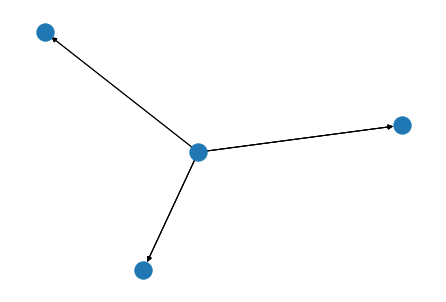

In [46]:
# nx.draw(G)


In [33]:
type(ZURICH_HB_ID)

int